In [1]:
# Install packages
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993331 sha256=2df4c01238c9df14dfdf6e79b115cc133cefff7fe374bb5c56af18157f52c5dc
  Stored in directory: /Users/tessacannon/Library/Caches/pip/wheels/eb/87/25/2dddf1c94e1786054e25022ec5530bfed52bad86d882999c48
Successfully built langdetect


In [37]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, DetectorFactory
import re
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import math

In [42]:
# Import csv

df = pd.read_csv('/Users/tessacannon/Documents/Vinted Project/fairy_0506.csv')

In [43]:
# Visualize the df
display(df)

title              brand  \
0                    white & black fairy print t-shirt                h&m   
1        shein light blue hanky hem layered mini skirt              shein   
2                   mesh fairy core white cami tie top            primark   
3    lilac drape cowl neck chiffon mini dress prett...  prettylittlething   
4                              green cropped fairy top                NaN   
..                                                 ...                ...   
994  ego blue and red mesh ombré asymmetric ruched ...                ego   
995                                neon green mesh top                NaN   
996      y2k white polka dot mesh off the shoulder top                NaN   
997  asos white pointelle baby tee with red rose de...               asos   
998  plt prettylittlething black silver ring cutout...  prettylittlething   

            condition    size  price  total_price  seller_description  \
0           very good  xs / 6    2.0         2.80                 NaN   
1           very good  xs / 6    3.0         3.85                 NaN   
2    new without tags  xs / 6    2.0         2.80                 NaN   
3       new with tags  xs / 6    6.0         7.00                 NaN   
4           very good  xs / 6    2.0         2.80                 NaN   
..                ...     ...    ...          ...                 ...   
994     new with tags  xs / 6    5.0         5.95                 NaN   
995  new without tags  xs / 6   13.0        14.35                 NaN   
996  new without tags  xs / 6   20.0        21.70                 NaN   
997  new without tags  xs / 6   20.0        21.70                 NaN   
998     new with tags  xs / 6    8.0         9.10                 NaN   

                                              item_url  \
0    https://www.vinted.co.uk/items/6265756935-whit...   
1    https://www.vinted.co.uk/items/6057490069-shei...   
2    https://www.vinted.co.uk/items/6208470830-mesh...   
3    https://www.vinted.co.uk/items/6090338339-lila...   
4    https://www.vinted.co.uk/items/2045189261-gree...   
..                                                 ...   
994  https://www.vinted.co.uk/items/6245292175-ego-...   
995  https://www.vinted.co.uk/items/6263929665-neon...   
996  https://www.vinted.co.uk/items/6265389553-y2k-...   
997  https://www.vinted.co.uk/items/6221980347-asos...   
998  https://www.vinted.co.uk/items/6241707643-plt-...   

                                             image_url  
0    https://images1.vinted.net/t/01_0133d_DjJenszG...  
1    https://images1.vinted.net/t/04_01886_4bborUWe...  
2    https://images1.vinted.net/t/03_02114_9AD3iwci...  
3    https://images1.vinted.net/t/04_022cc_KMg3iR6e...  
4    https://images1.vinted.net/t/02_015e4_TJUT75P8...  
..                                                 ...  
994  https://images1.vinted.net/t/04_003c9_RktsRKGA...  
995  https://images1.vinted.net/t/04_0094c_izhhH6Lg...  
996  https://images1.vinted.net/t/04_00ebc_cZCFHayP...  
997  https://images1.vinted.net/t/04_01577_8sGgpMAQ...  
998  https://images1.vinted.net/t/02_016a6_EbaSi2Tc...  

[999 rows x 9 columns]

# Data Analysis

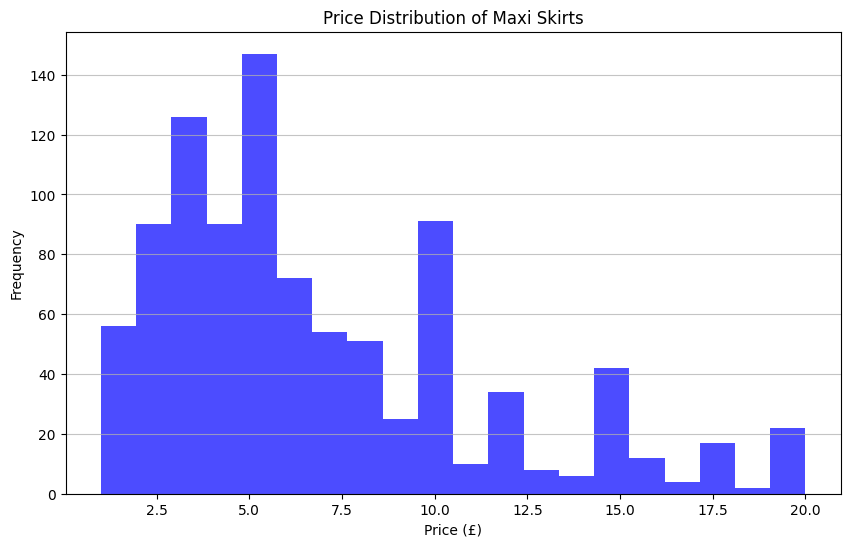

In [44]:
# Get histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='blue', alpha=0.7)
plt.title('Price Distribution of Maxi Skirts')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

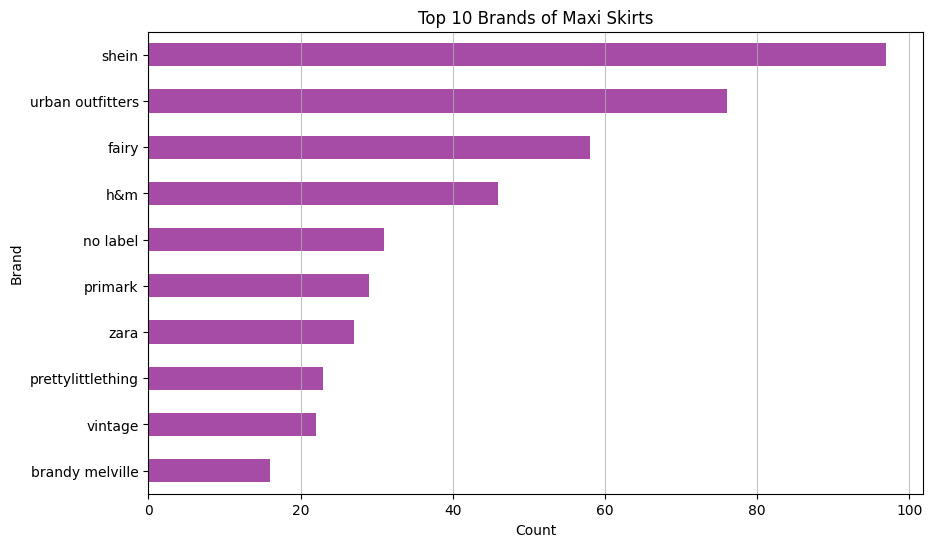

In [45]:
# Get the top 10 brands (horizontal bar chart)
plt.figure(figsize=(10, 6))
top_brands = df['brand'].value_counts().head(10).sort_values(ascending=True)
top_brands.plot(kind='barh', color='purple', alpha=0.7)
plt.title('Top 10 Brands of Maxi Skirts')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.grid(axis='x', alpha=0.75)
plt.show()

# Personalized Search

In [ ]:
# Define custom functions

def is_romance_language(text):
    DetectorFactory.seed = 0  # for consistent results
    try:
        lang = detect(text)
        return lang in ['es', 'it', 'fr']
    except:
        return False

def is_fast_fashion(text):
    fast_fashion_brands = [
    'Zara', 'H&M', 'Forever 21', 'Primark', 'Boohoo', 'PrettyLittleThing', 'Shein', 'Topshop', 'Missguided',
    'New Look', 'ASOS', 'Mango', 'Stradivarius', 'Pull&Bear', 'Bershka', 'Oysho', 'Uterque', 'Zalando', 'Reserved',
    'BoohooMAN', 'Cider', 'Nasty Gal', 'Romwe', 'Zaful', 'Forever21', 'PLT', 'Marks & Spencer', 'Urban Outfitters',
    'Fashion Nova', 'Charlotte Russe', 'Uniqlo', 'Cotton On', 'Shasa', 'Garage', 'Hollister', 'Abercrombie & Fitch',
    'Rue21', 'Wet Seal', 'Papaya', 'Tobi', 'Aeropostale', 'Express', 'Guess', 'American Eagle', 'PacSun', 'Brandy Melville',
    'Lulus', 'ModCloth', 'Free People', 'Anthropologie', 'Aerie', 'Old Navy', 'Gap', 'Banana Republic', 'J.Crew',
    'Pull & Bear', 'Oh Polly', 'Princess Polly','American Apparel', 'Motel Rocks','House of CB'
    ]
    
    # Handle non-string inputs
    if not isinstance(text, str):
        return False
    
    # Convert only non-numeric characters to lowercase
    processed_text = ''.join(char.lower() if not char.isdigit() else char for char in text)
    
    return any(brand.lower() in processed_text for brand in fast_fashion_brands) 

def display_image_grid(image_urls, max_images=20, images_per_row=5):
    """
    Displays a grid of images from a list of URLs.

    Args:
        image_urls (list): List of image URLs.
        max_images (int): Max number of images to show.
        images_per_row (int): Number of images per row in the grid.
    """
    num_images = min(len(image_urls), max_images)
    rows = math.ceil(num_images / images_per_row)
    fig, axs = plt.subplots(rows, images_per_row, figsize=(images_per_row * 3, rows * 4))
    axs = axs.flatten() if num_images > 1 else [axs]

    for i in range(images_per_row * rows):
        ax = axs[i]
        if i < num_images:
            try:
                response = requests.get(image_urls[i], timeout=5)
                img = Image.open(BytesIO(response.content))
                ax.imshow(img)
                ax.axis('off')
            except Exception as e:
                print(f"Failed to load image {i}: {e}")
                ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
# Detect french, spanish, or italian brands

df['is_romance'] = df['brand'].apply(is_romance_language)
filtered_df = df[df['is_romance']]
# List number of unqiue brands
unique_brands = filtered_df['brand'].nunique()
print(f"Number of unique brands in romance languages: {unique_brands}")

# Print the romance language brands
romance_brands = filtered_df['brand'].unique()
print("Romance language brands:")
for brand in romance_brands:
    print(brand)


Number of unique brands in romance languages: 27


Number of non-fast fashion brands: 538


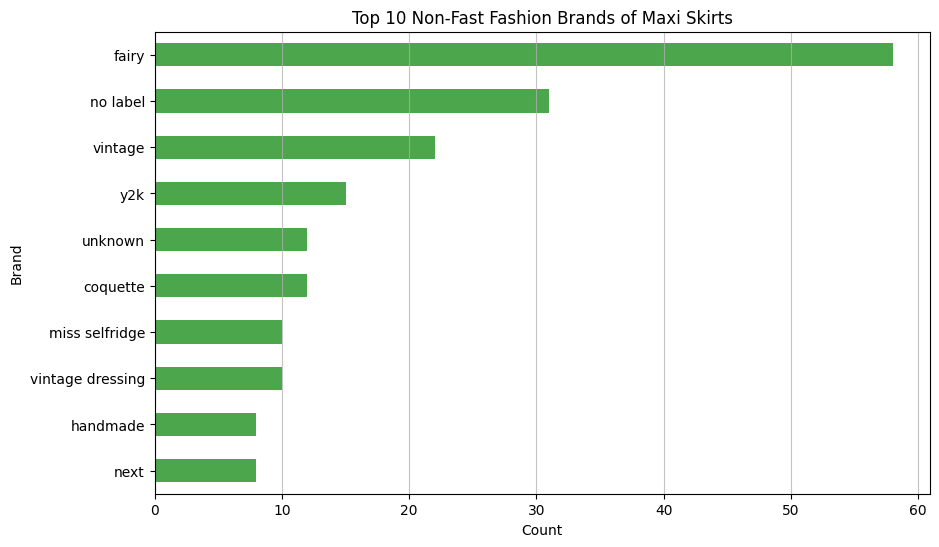

In [ ]:
# Detect fast fashion brands 

# Apply the function to the 'brand' column
df['is_fast_fashion'] = df['brand'].apply(is_fast_fashion)

# Count the number of non-fast fashion brands
non_fast_fashion_count = df[~df['is_fast_fashion']].shape[0]
print(f"Number of non-fast fashion brands: {non_fast_fashion_count}")
# Get the top 10 non-fast fashion brands
plt.figure(figsize=(10, 6))
top_non_fast_fashion_brands = df[~df['is_fast_fashion']]['brand'].value_counts().head(10).sort_values(ascending=True)
top_non_fast_fashion_brands.plot(kind='barh', color='green', alpha=0.7)
plt.title('Top 10 Non-Fast Fashion Brands of Maxi Skirts')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.grid(axis='x', alpha=0.75)
plt.show()

# Get list of non-fast fashion brands
non_fast_fashion_brands = df[~df['is_fast_fashion']]['brand'].unique()
print("List of non-fast fashion brands:")
for brand in non_fast_fashion_brands:
    print(brand)

Failed to load image 10: Invalid URL '/assets/no-photo/user-empty-state.svg': No scheme supplied. Perhaps you meant https:///assets/no-photo/user-empty-state.svg?


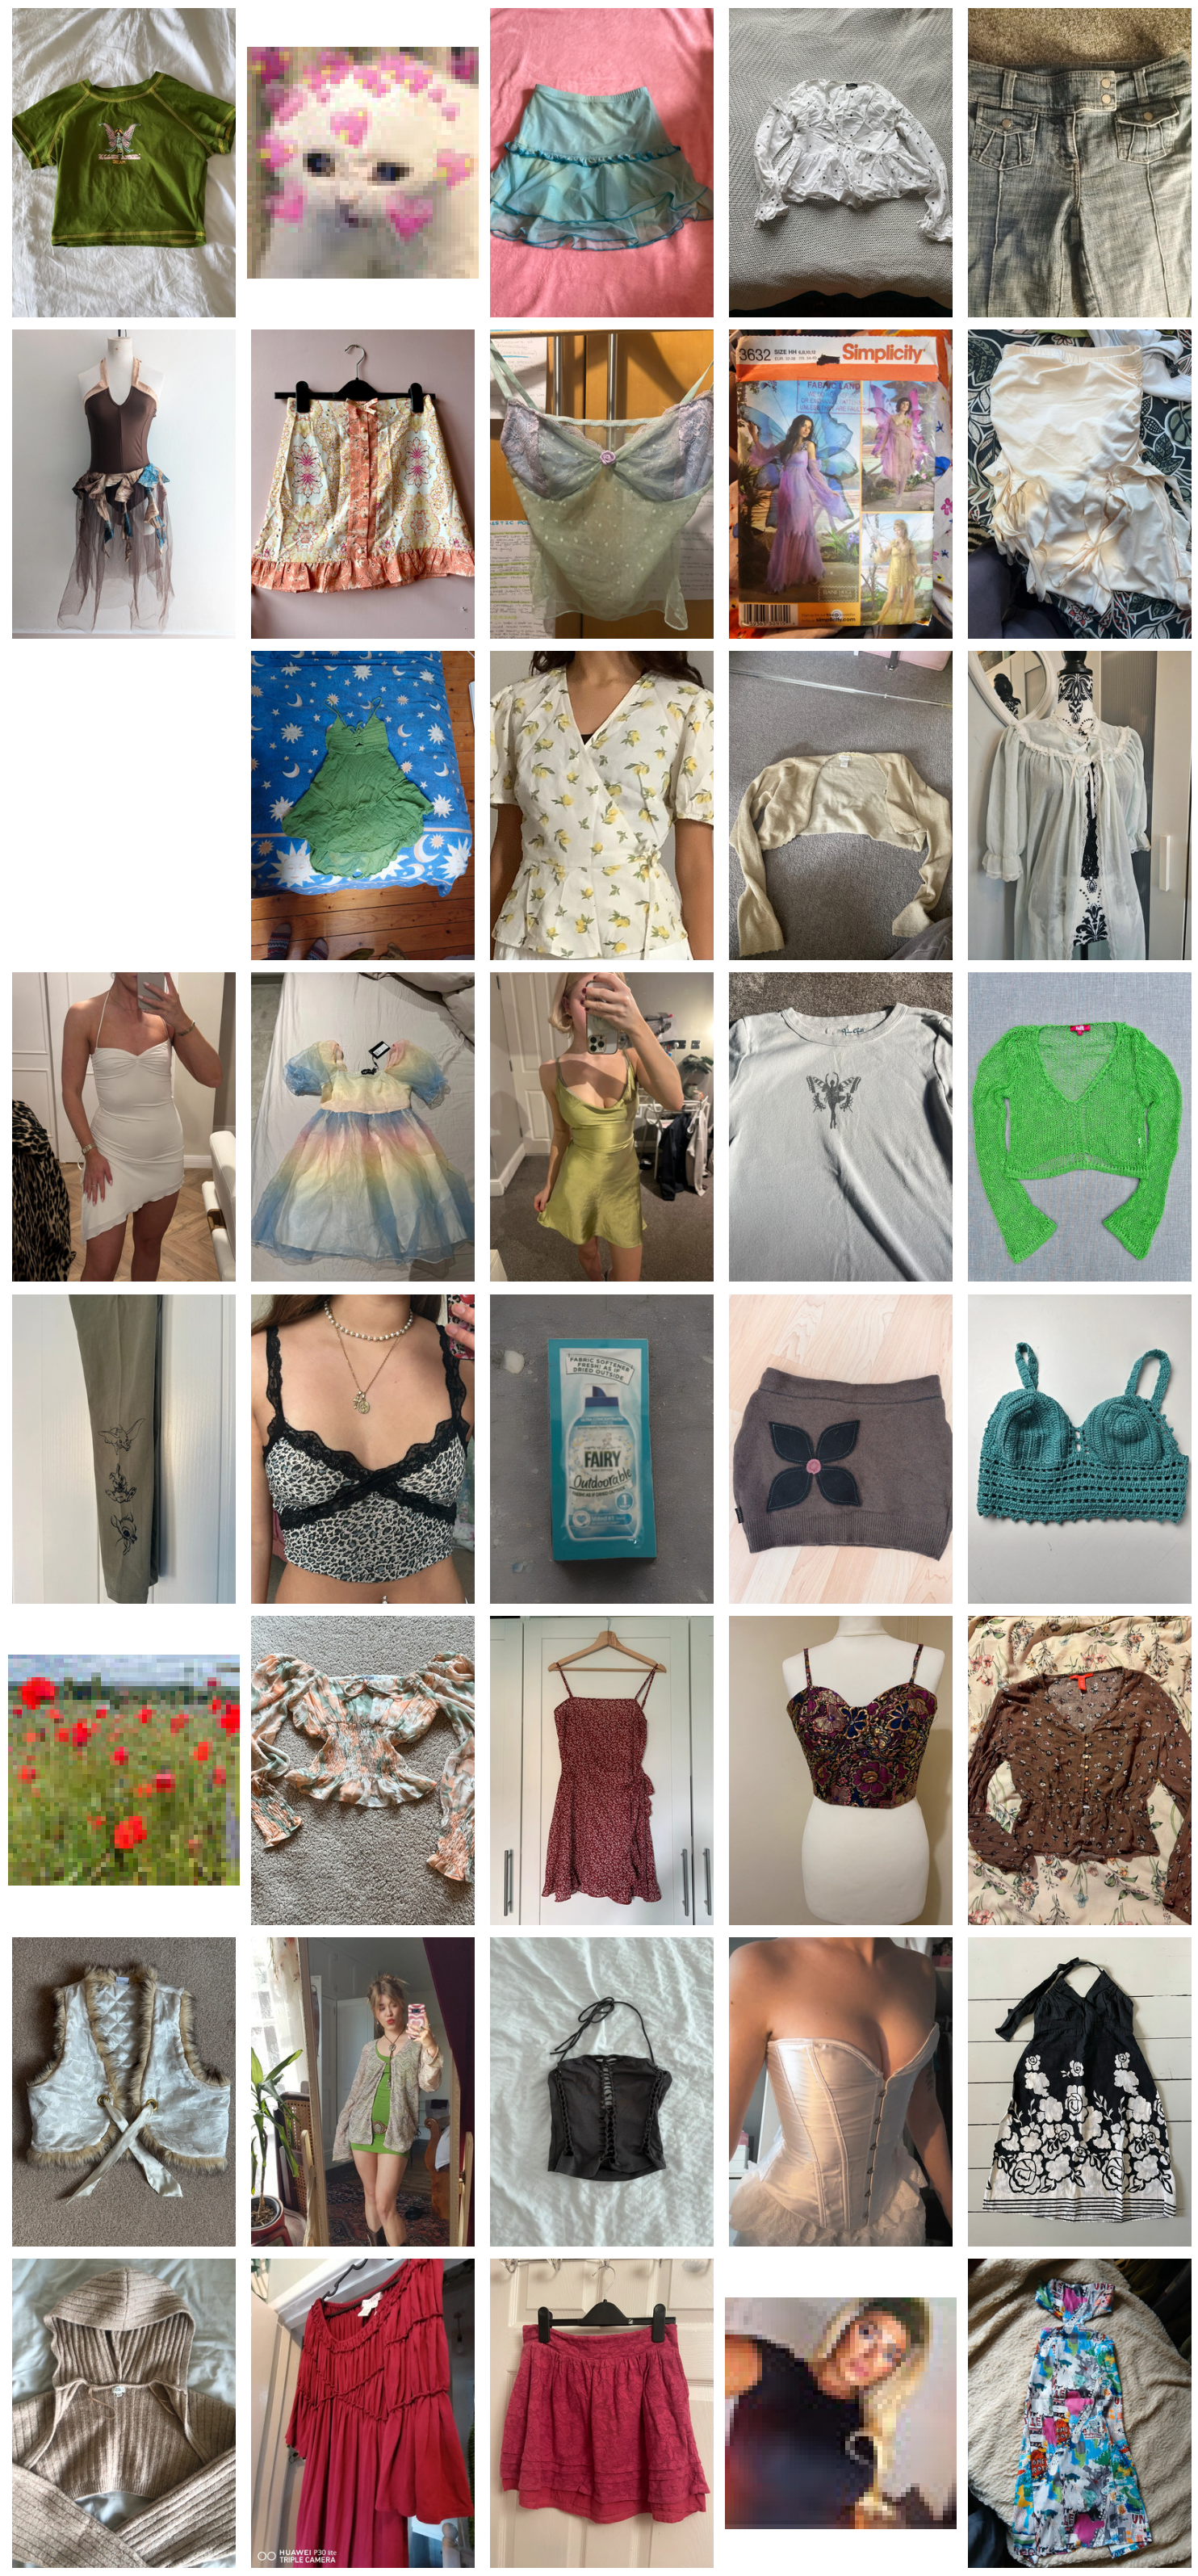

In [ ]:
# Create grid of item images

# Get images from the filered df
filtered_df = df[df['is_fast_fashion'] == False]
image_urls = filtered_df['image_url'].tolist()

# Show the first 20 images in a 5x4 grid
display_image_grid(image_urls, max_images=40, images_per_row=5)
